In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import kruskal
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
fname ='dungeon performance ranks 28.01 - 24.02' 
df = pd.read_csv(fname + '.csv')

In [3]:
df

,userId,dungeonId,sessionId,eventType,PartyMembers,entryTime,exitTime,duration,gameTime,min_fps,...,median_fps,p75_fps,p10_fps,min_ping,max_ping,p25_ping,median_ping,p75_ping,p90_ping,rn
0,01JJP0D87N8MNWKDXDTAMQFCNN,NaN,01JJSPP823VSDDBDCY94NAWHSK,extraction,2,2025-01-29 18:55:37.499 UTC,2025-01-29 18:59:27.5 UTC,0-0 0 0:3:50.001,114,42.526154,...,61.835065,68.217187,45.441178,220.80,372.500,233.90,253.200,287.70,315.80,14
1,01JJP0D87N8MNWKDXDTAMQFCNN,NaN,01JJSR5JY1K39W0J2S5P3D72WQ,extraction,3,2025-01-29 19:21:28.499 UTC,2025-01-29 19:24:47.5 UTC,0-0 0 0:3:19.001,132,34.921270,...,43.457030,51.310392,40.347834,232.90,327.600,235.60,259.600,276.70,301.30,15
2,01JJP0D87N8MNWKDXDTAMQFCNN,NaN,01JJSRH2KN07S5ZMP9JZ2BWH7M,extraction,3,2025-01-29 19:27:45.5 UTC,2025-01-29 19:33:18.499 UTC,0-0 0 0:5:32.999,219,26.352313,...,43.911825,56.552065,36.849332,246.00,975.500,264.40,278.400,305.70,405.60,16
3,01JJP0D87N8MNWKDXDTAMQFCNN,NaN,01JJTNPCZ8ZZJJZERECTSVAMHR,extraction,2,2025-01-30 03:57:29.5 UTC,2025-01-30 04:12:26.499 UTC,0-0 0 0:14:56.999,628,22.126079,...,45.265802,57.685595,28.280473,216.90,340.800,236.30,253.600,282.20,302.80,17
4,01JJP0D87N8MNWKDXDTAMQFCNN,NaN,01JJTVJQY783CAFNZKPNGJHB3X,extraction,3,2025-01-30 05:40:21.5 UTC,2025-01-30 05:55:40.5 UTC,0-0 0 0:15:19,582,20.402400,...,39.660907,50.328172,27.556507,220.90,336.600,241.00,255.400,273.30,295.00,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102861,01JK7E6ZN1BGG0D0YD0VDW6JAT,dc_desert_tier1,01JK9ZN910V2NTFKJG6H9X9HC2,extraction,1,2025-02-05 02:40:14.5 UTC,2025-02-05 02:57:33.5 UTC,0-0 0 0:17:19,691,27.497160,...,38.550253,49.107226,29.400105,255.90,346.500,270.60,275.800,296.30,326.20,13
102862,01JKENE8TPC7F2CZAARE7ZYKB5,dc_desert_tier1,01JKJKF3RWKSQWW7C0T8QW3PDA,extraction,1,2025-02-08 11:00:14.5 UTC,2025-02-08 11:10:58.499 UTC,0-0 0 0:10:43.999,522,54.097725,...,96.735961,110.210723,69.673873,75.60,154.900,85.30,87.100,103.20,109.20,13
102863,01JMDYX480470A5F35MXZHZ52J,dc_desert_tier1,01JME33K5T6V9K9XTPZ0TPWVVZ,died,1,2025-02-19 03:13:08.5 UTC,2025-02-19 03:28:02.5 UTC,0-0 0 0:14:54,548,12.488598,...,23.486852,30.634035,15.958845,72.70,422.100,97.40,131.500,151.50,175.80,13
102864,01JMJAD8J8T0PVFJ44XJC0V2EP,dc_desert_lush_tier1,01JMK9BKF8F9BZ45XN0476YV7P,extraction,1,2025-02-21 03:38:29.499 UTC,2025-02-21 03:50:36.5 UTC,0-0 0 0:12:7.001,466,34.621090,...,61.466281,80.305160,41.589400,79.34,210.560,101.84,127.000,167.46,183.58,13


In [4]:
df.drop['dungeonId'].isin(['dc_tutorial_tier3','dc_weekly_challenge_1','dc_desert_gd_1',])

TypeError: 'method' object is not subscriptable

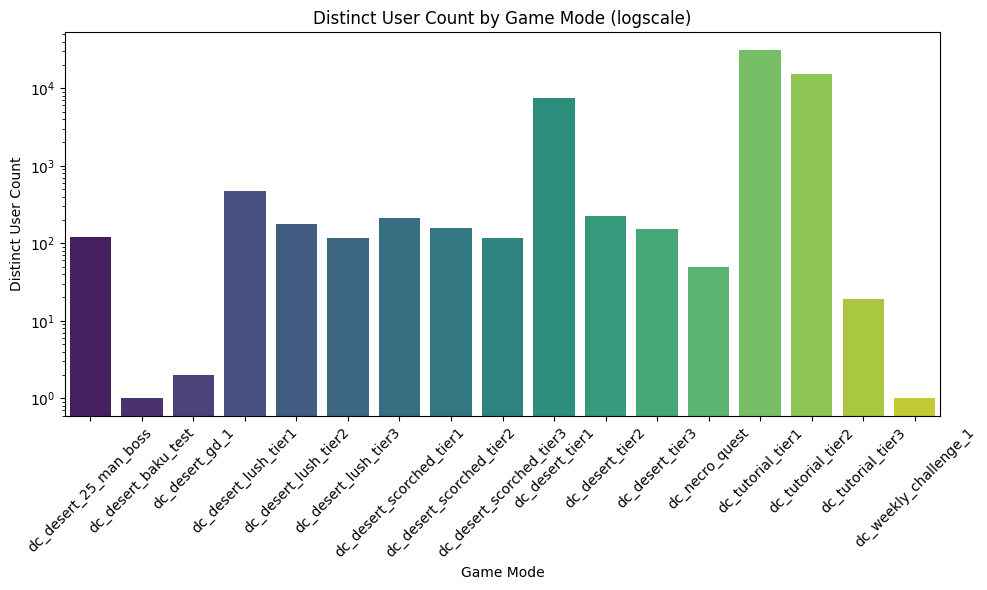

In [ ]:
# Count distinct userIds in each game mode
distinct_user_counts = df.groupby("dungeonId")["userId"].nunique().reset_index()

# Rename columns for clarity
distinct_user_counts.columns = ["dungeonId", "DistinctUserCount"]

# Plot the distinct user counts
plt.figure(figsize=(10, 6))
sns.barplot(data=distinct_user_counts, x="dungeonId", y="DistinctUserCount", palette="viridis")
plt.title("Distinct User Count by Game Mode (logscale)")
plt.xlabel("Game Mode")
plt.ylabel("Distinct User Count")
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
exclude_gameModes = ['dc_desert_gd_1','dc_desert_baku_test','dc_weekly_challenge_1']
df = df[~df['dungeonId'].isin(exclude_gameModes)]
df['dungeonId'].unique()



array([nan, 'dc_desert_tier1', 'dc_desert_lush_tier1',
       'dc_desert_scorched_tier1', 'dc_desert_lush_tier2',
       'dc_desert_tier2', 'dc_desert_scorched_tier2', 'dc_desert_tier3',
       'dc_desert_lush_tier3', 'dc_desert_scorched_tier3',
       'dc_desert_25_man_boss', 'dc_tutorial_tier2', 'dc_tutorial_tier1',
       'dc_tutorial_tier3', 'dc_necro_quest'], dtype=object)

In [29]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower bound
    upper_bound = Q3 + 1.5 * IQR    # Upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]




/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

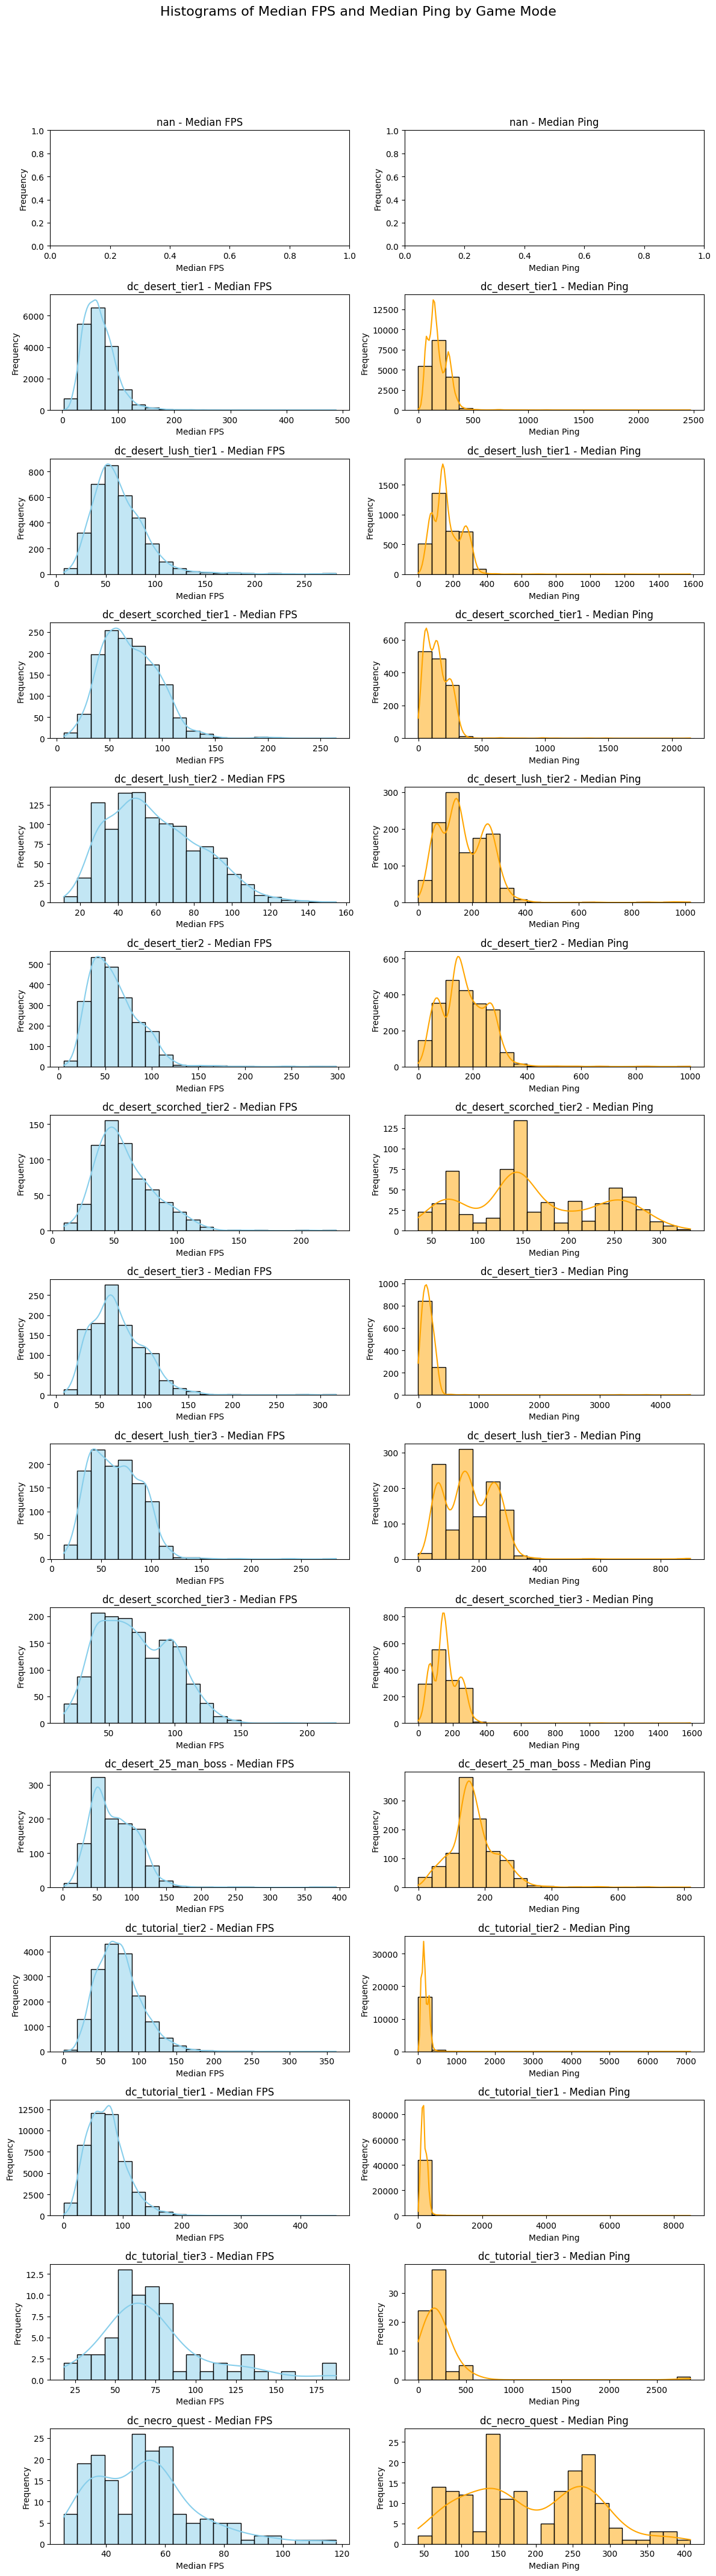

In [30]:
game_modes = df["dungeonId"].unique()

fig, axs = plt.subplots(len(game_modes), 2, figsize=(12, len(game_modes) * 3))
fig.suptitle("Histograms of Median FPS and Median Ping by Game Mode", fontsize=16)

for i, game_mode in enumerate(game_modes):
    # Filter data for the current game mode
    game_mode_data = df[df["dungeonId"] == game_mode]

    # Plot histogram for median FPS
    sns.histplot(game_mode_data["median_fps"], kde=True, bins=20, ax=axs[i, 0], color="skyblue")
    axs[i, 0].set_title(f"{game_mode} - Median FPS")
    axs[i, 0].set_xlabel("Median FPS")
    axs[i, 0].set_ylabel("Frequency")

    # Plot histogram for median Ping
    sns.histplot(game_mode_data["median_ping"], kde=True, bins=20, ax=axs[i, 1], color="orange")
    axs[i, 1].set_title(f"{game_mode} - Median Ping")
    axs[i, 1].set_xlabel("Median Ping")
    axs[i, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [31]:
df_filtered = df.copy()


# Add an 'isDC' column to indicate disconnections
df_filtered['isDC'] = ((df_filtered['median_ping'] < 0) | 
                       (df_filtered['max_ping'] < 0) | 
                       (df_filtered['p25_ping'] < 0) | 
                       (df_filtered['min_ping'] < 0)| 
                       (df_filtered['p75_ping'] < 0)
)

# Ensure the columns are float type before replacing -1 with NaN
columns_to_fix = ['median_ping', 'max_ping', 'p25_ping','p75_ping','min_ping']
df_filtered[columns_to_fix] = df_filtered[columns_to_fix].astype(float)

# Replace -1 values with NaN so they don't interfere with regression analysis
df_filtered[columns_to_fix] = df_filtered[columns_to_fix].replace(-1, np.nan)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

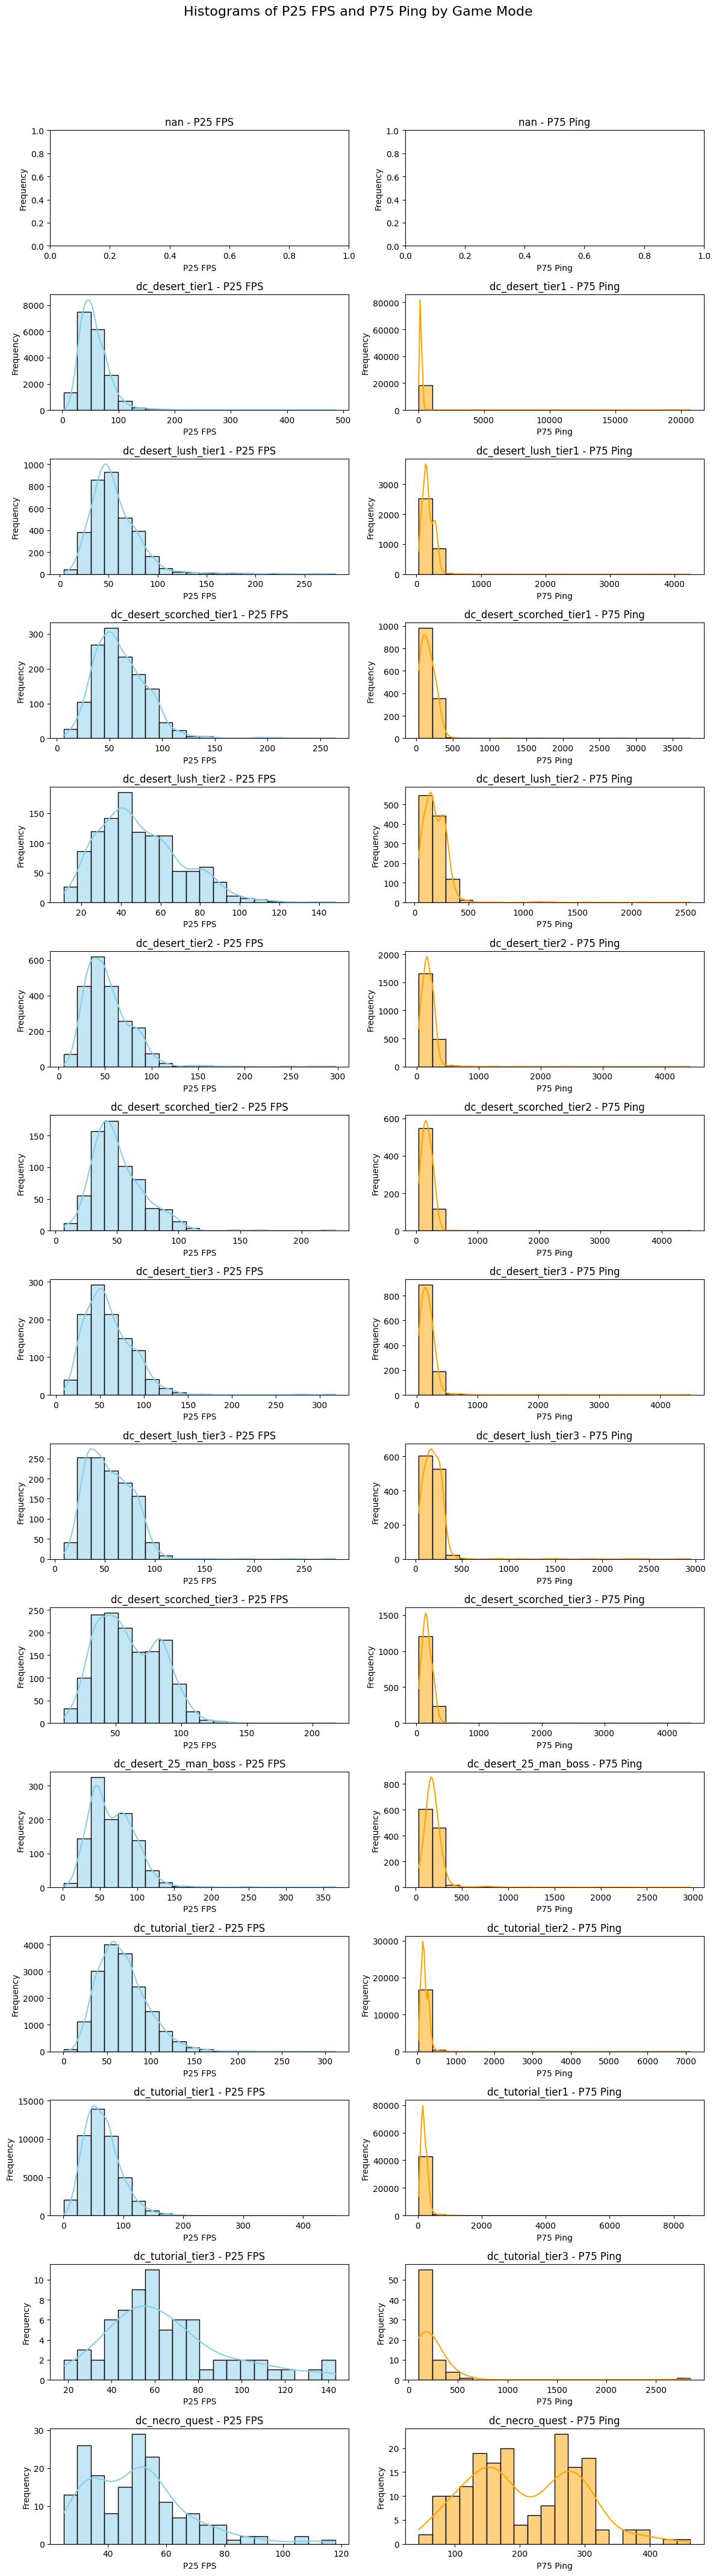

In [32]:
fig, axs = plt.subplots(len(game_modes), 2, figsize=(12, len(game_modes) * 3))
fig.suptitle("Histograms of P25 FPS and P75 Ping by Game Mode", fontsize=16)

# Ensure axs is always a 2D array
if len(game_modes) == 1:
    axs = [axs]  # Convert axs to a list for consistent indexing

# Loop through each game mode and plot histograms
for i, game_mode in enumerate(game_modes):
    # Filter data for the current game mode
    game_mode_data = df_filtered[df_filtered["dungeonId"] == game_mode]

    # Plot histogram for P25 FPS
    sns.histplot(game_mode_data["p25_fps"], kde=True, bins=20, ax=axs[i, 0], color="skyblue")
    axs[i, 0].set_title(f"{game_mode} - P25 FPS")
    axs[i, 0].set_xlabel("P25 FPS")
    axs[i, 0].set_ylabel("Frequency")

    # Plot histogram for P75 Ping
    sns.histplot(game_mode_data["p75_ping"], kde=True, bins=20, ax=axs[i, 1], color="orange")
    axs[i, 1].set_title(f"{game_mode} - P75 Ping")
    axs[i, 1].set_xlabel("P75 Ping")
    axs[i, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

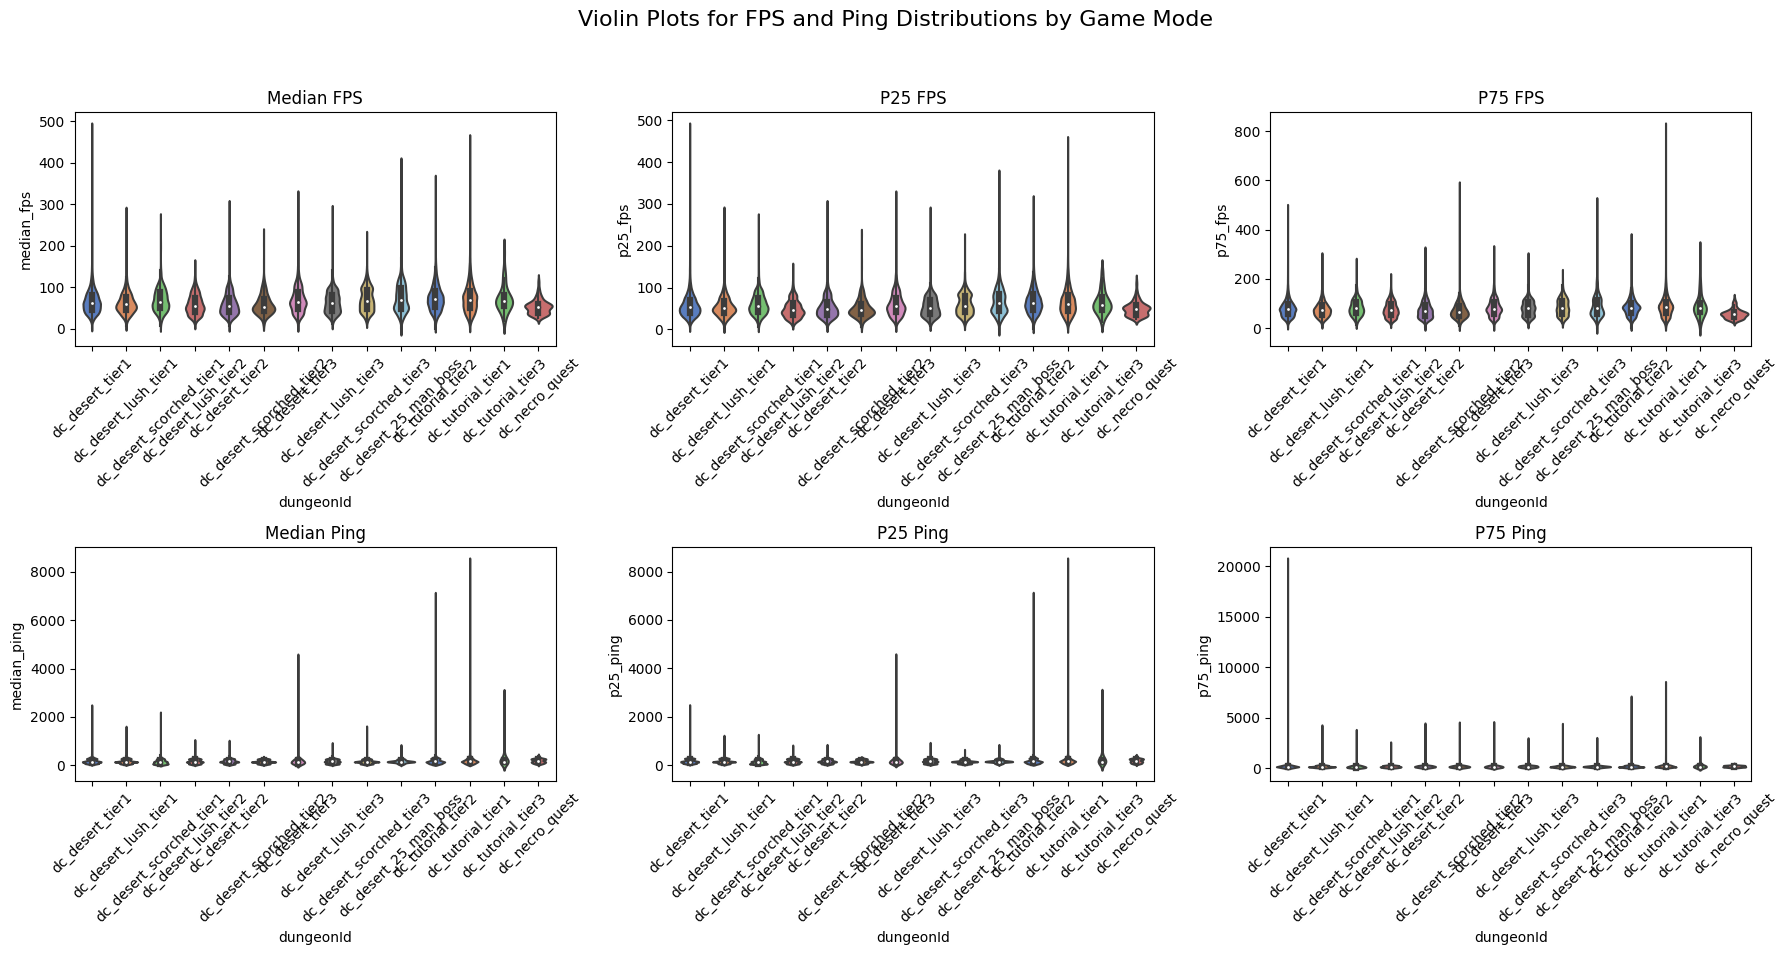

In [35]:
# Generate violin plots again with the filtered data

def violin_plots(data):
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle("Violin Plots for FPS and Ping Distributions by Game Mode", fontsize=16)    
    # FPS Metrics
    sns.violinplot(data, x="dungeonId", y="median_fps", ax=axs[0, 0], palette="muted")
    axs[0, 0].set_title("Median FPS")
    axs[0, 0].tick_params(axis='x', rotation=45)

    sns.violinplot(data, x="dungeonId", y="p25_fps", ax=axs[0, 1], palette="muted")
    axs[0, 1].set_title("P25 FPS")
    axs[0, 1].tick_params(axis='x', rotation=45)

    sns.violinplot(data, x="dungeonId", y="p75_fps", ax=axs[0, 2], palette="muted")
    axs[0, 2].set_title("P75 FPS")
    axs[0, 2].tick_params(axis='x', rotation=45)

    # Ping Metrics
    sns.violinplot(data, x="dungeonId", y="median_ping", ax=axs[1, 0], palette="muted")
    axs[1, 0].set_title("Median Ping")
    axs[1, 0].tick_params(axis='x', rotation=45)

    sns.violinplot(data, x="dungeonId", y="p25_ping", ax=axs[1, 1], palette="muted")
    axs[1, 1].set_title("P25 Ping")
    axs[1, 1].tick_params(axis='x', rotation=45)

    sns.violinplot(data, x="dungeonId", y="p75_ping", ax=axs[1, 2], palette="muted")
    axs[1, 2].set_title("P75 Ping")
    axs[1, 2].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
 
violin_plots(df_filtered)   


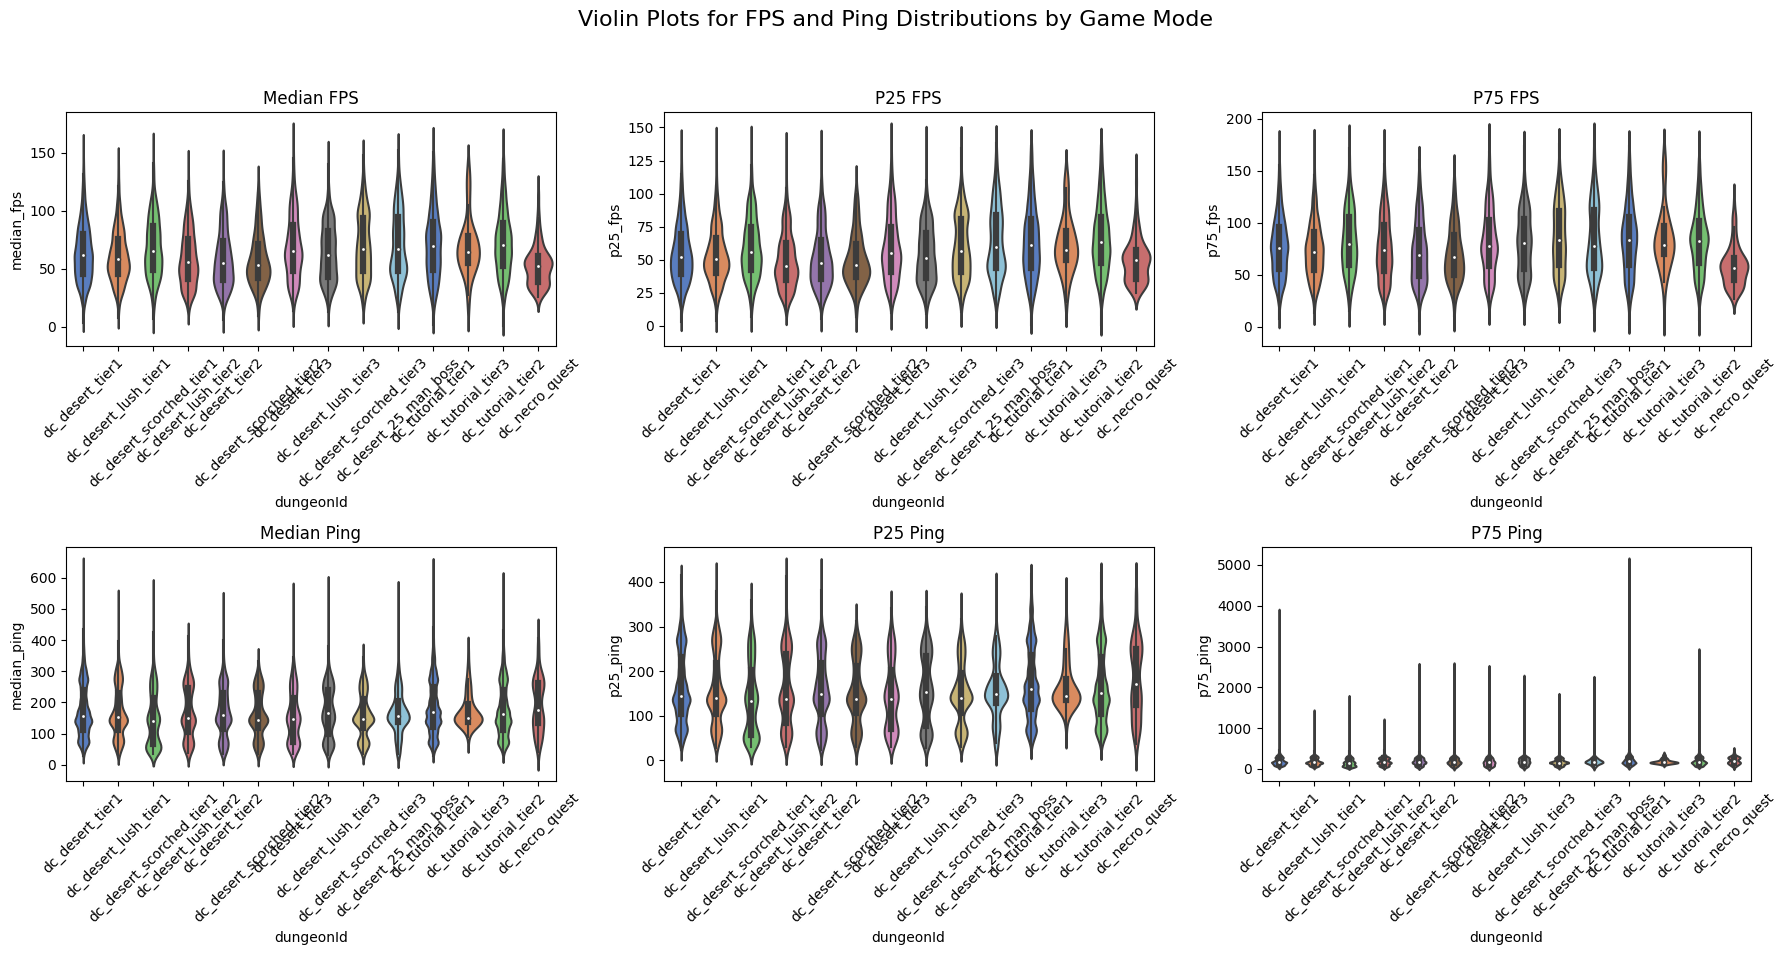

In [37]:
# remove 3*SD outliers for visualisation

def remove_outliers_3sd(df, columns):
    for col in columns:
        if col in df.columns:
            mean = df[col].mean()
            std = df[col].std()
            lower_bound = mean - 3 * std
            upper_bound = mean + 3 * std
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns to check for outliers
columns_to_check = ['median_ping', 'max_ping', 'p25_ping', 'median_fps', 'p25_fps', 'p75_fps']

# Remove outliers
df_filtered_no_outliers = remove_outliers_3sd(df_filtered, columns_to_check)

violin_plots(df_filtered_no_outliers)   

In [65]:
df_filtered_no_outliers.groupby('dungeonId')['p90_ping'].quantile(0.25)

dungeonId
dc_desert_25_man_boss       153.97500
dc_desert_lush_tier1        136.98000
dc_desert_lush_tier2        136.44500
dc_desert_lush_tier3        139.87500
dc_desert_scorched_tier1     92.20375
dc_desert_scorched_tier2    144.73000
dc_desert_scorched_tier3    143.56250
dc_desert_tier1             140.30000
dc_desert_tier2             140.35625
dc_desert_tier3             103.31250
dc_necro_quest              158.31625
dc_tutorial_tier1           149.20000
dc_tutorial_tier2           139.60000
dc_tutorial_tier3           155.27250
Name: p90_ping, dtype: float64

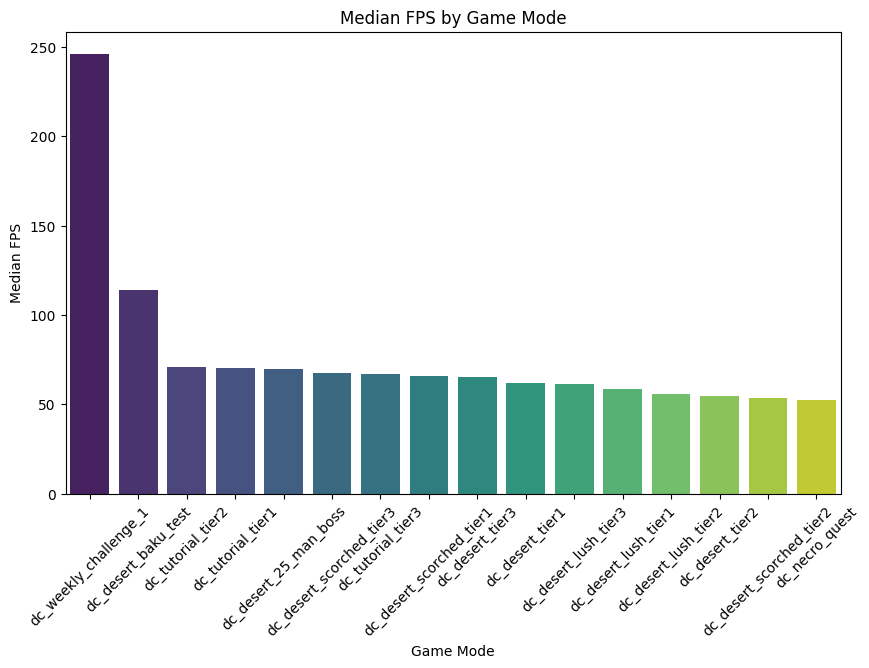

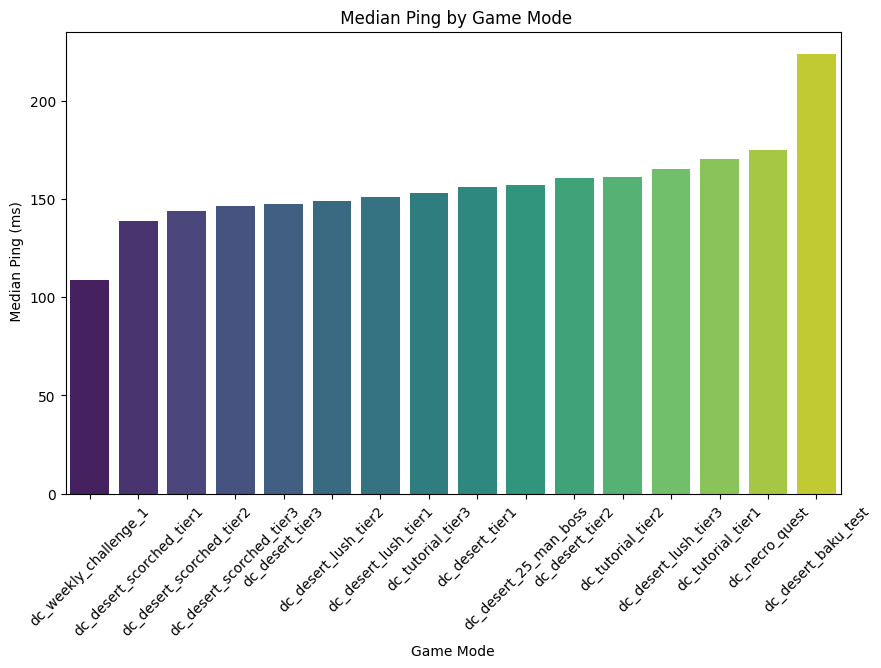

In [16]:
aggregated = df.groupby("dungeonId").agg({
    "median_fps": "median",
    "median_ping": "median"
}).sort_values(by="median_fps", ascending=False).reset_index()

# Bar chart for Median FPS
plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated, x="dungeonId", y="median_fps", palette="viridis")
plt.title("Median FPS by Game Mode")
plt.ylabel("Median FPS")
plt.xlabel("Game Mode")
plt.xticks(rotation=45)
plt.show()

# Bar chart for Median Ping
aggregated = aggregated.sort_values(by="median_ping", ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated, x="dungeonId", y="median_ping", palette="viridis")
plt.title(" Median Ping by Game Mode")
plt.ylabel(" Median Ping (ms)")
plt.xlabel("Game Mode")
plt.xticks(rotation=45)
plt.show()

In [17]:
df_tutorial = df_filtered[df_filtered['dungeonId'].isin(['dc_tutorial_tier1', 'dc_tutorial_tier2'])]
df_tutorial_no_outliers  = remove_outliers_3sd(df_tutorial,columns_to_check)
df_tutorial

,userId,dungeonId,sessionId,eventType,PartyMembers,entryTime,exitTime,duration,gameTime,min_fps,...,p75_fps,p10_fps,min_ping,max_ping,p25_ping,median_ping,p75_ping,p90_ping,rn,isDC
233,01JJW8BNYCCFHPK1E3VQW5QYDF,dc_tutorial_tier2,01JK1GS4MFSP687JF2H2E7V1P1,abandoned,2,2025-02-01 19:46:17.5 UTC,2025-02-01 19:50:31.5 UTC,0-0 0 0:4:14,227,40.141221,...,68.033861,56.850972,NaN,4077.085,883.570,1081.735,2283.240,3807.795,19,True
241,01JJW8BNYCCFHPK1E3VQW5QYDF,dc_tutorial_tier1,01JK92JB070WMHDVXX61TSTMVA,extraction,3,2025-02-04 18:11:50.499 UTC,2025-02-04 18:14:32.5 UTC,0-0 0 0:2:42.001,111,64.371222,...,83.971235,70.933825,244.485,357.985,247.055,272.830,298.905,303.745,27,False
337,01JMB8KSMFYQMRD2E19W51HDPZ,dc_tutorial_tier2,01JMKWDHRX6Q2SVVXWX3TYT7YA,extraction,1,2025-02-21 09:11:36.5 UTC,2025-02-21 09:17:08.5 UTC,0-0 0 0:5:32,260,53.058225,...,93.493012,64.441518,234.000,356.700,253.300,260.500,272.300,277.700,20,False
340,01JMB8KSMFYQMRD2E19W51HDPZ,dc_tutorial_tier2,01JMN99HTATA6KV799SPKB177F,extraction,3,2025-02-21 22:15:56.5 UTC,2025-02-21 22:22:02.5 UTC,0-0 0 0:6:6,219,47.513657,...,159.421843,53.325908,NaN,819.300,251.400,285.600,323.500,438.900,23,True
421,01JKWK2FB510G802PXPSK0X1SM,dc_tutorial_tier2,01JM1NA5TJPP6PK6WX06Z9NJBX,extraction,1,2025-02-14 07:21:06.5 UTC,2025-02-14 07:25:48.5 UTC,0-0 0 0:4:42,217,56.134391,...,65.633455,56.134391,296.700,359.600,306.700,316.100,320.200,359.600,38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102811,01JM6185J7T015667V5P34E93A,dc_tutorial_tier2,01JMF186QHC2NAXEVG9TQWN321,extraction,2,2025-02-19 11:59:56.5 UTC,2025-02-19 12:04:35.5 UTC,0-0 0 0:4:39,208,64.167043,...,78.293149,64.483550,118.400,167.500,134.900,135.800,139.300,155.100,13,False
102814,01JKZEKVQFCVZMGPGED4WCKRS5,dc_tutorial_tier2,01JM9H4RZ2NF2WVC9CENQKCXFN,extraction,2,2025-02-17 08:42:15.5 UTC,2025-02-17 08:47:17.5 UTC,0-0 0 0:5:2,213,72.711001,...,110.072255,80.062637,251.900,419.900,268.600,269.500,285.700,303.500,13,False
102823,01JMETFA6E6G84PSVX3Q2F53SG,dc_tutorial_tier2,01JMGX6VQQQQG490KRWY71SAPX,extraction,1,2025-02-20 05:27:42.5 UTC,2025-02-20 05:32:13.5 UTC,0-0 0 0:4:31,210,35.654695,...,58.201681,43.648921,192.600,270.100,202.500,211.900,235.600,242.200,13,False
102824,01HVPS1T8ETTHVRH9SGTDEM456,dc_tutorial_tier1,01JKE6YCE24497K95JJ65A86JD,extraction,1,2025-02-06 18:04:30.5 UTC,2025-02-06 18:07:03.5 UTC,0-0 0 0:2:33,107,126.323526,...,149.656667,127.080170,165.025,297.570,165.570,169.725,172.195,173.865,13,False


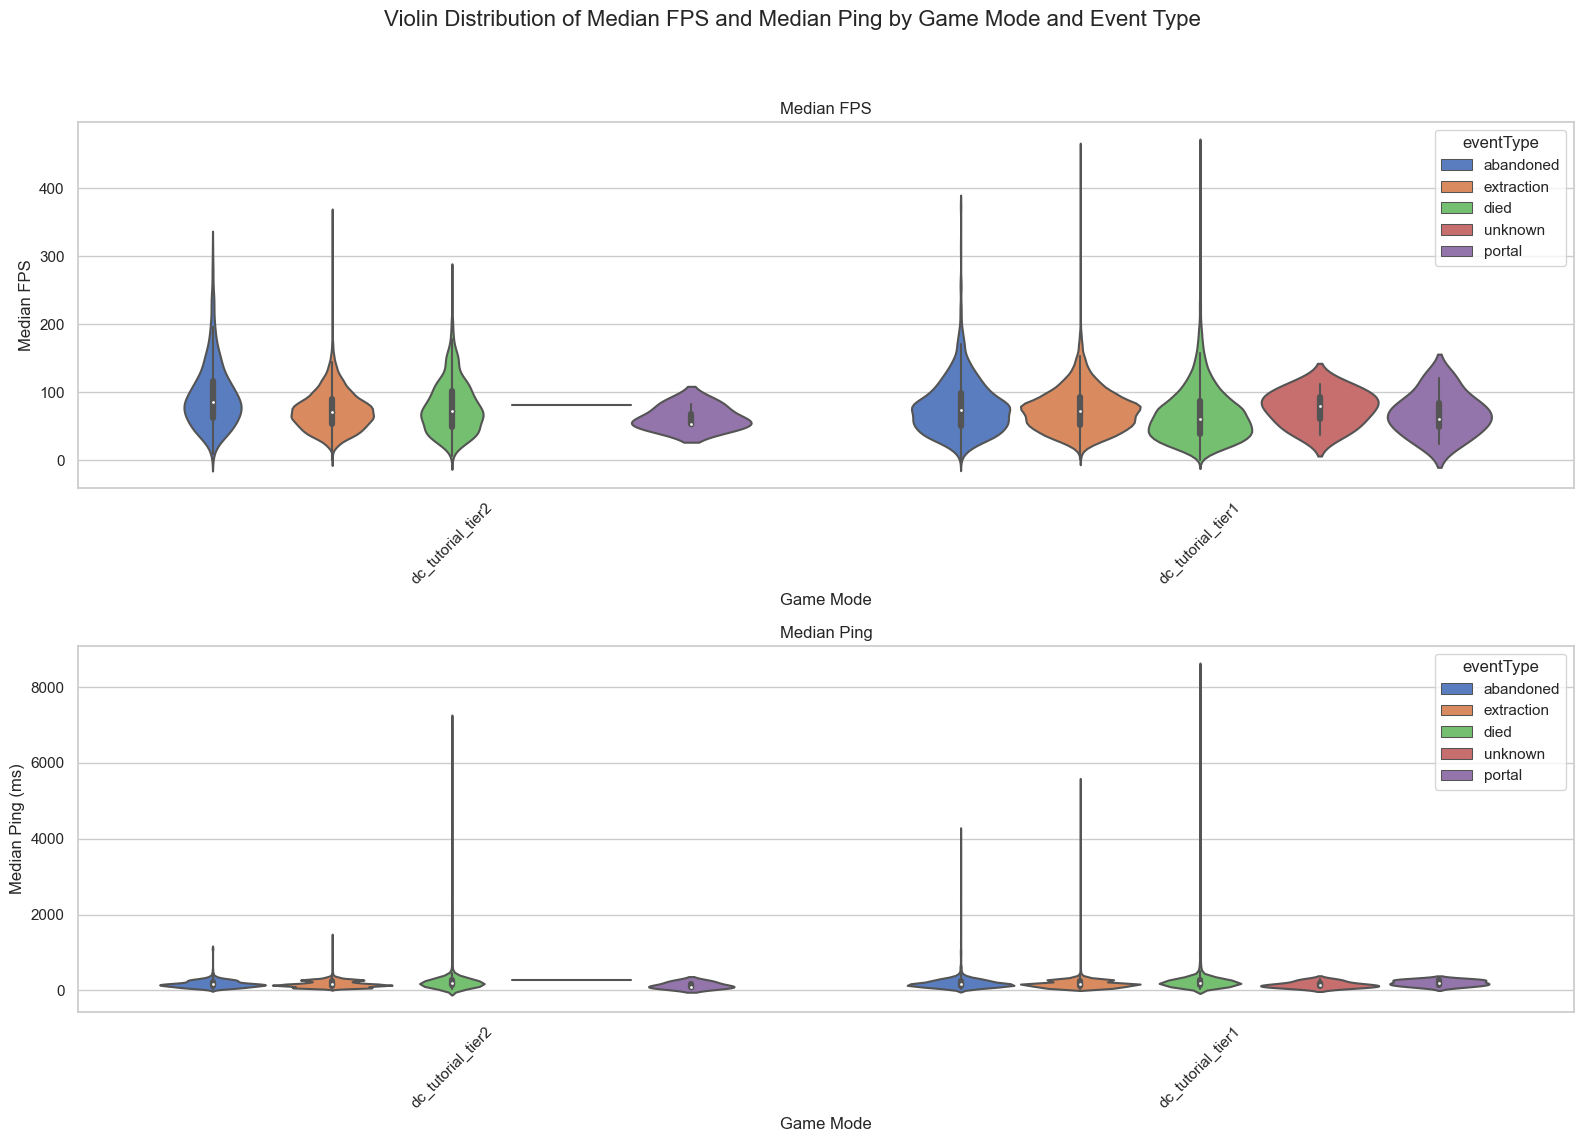

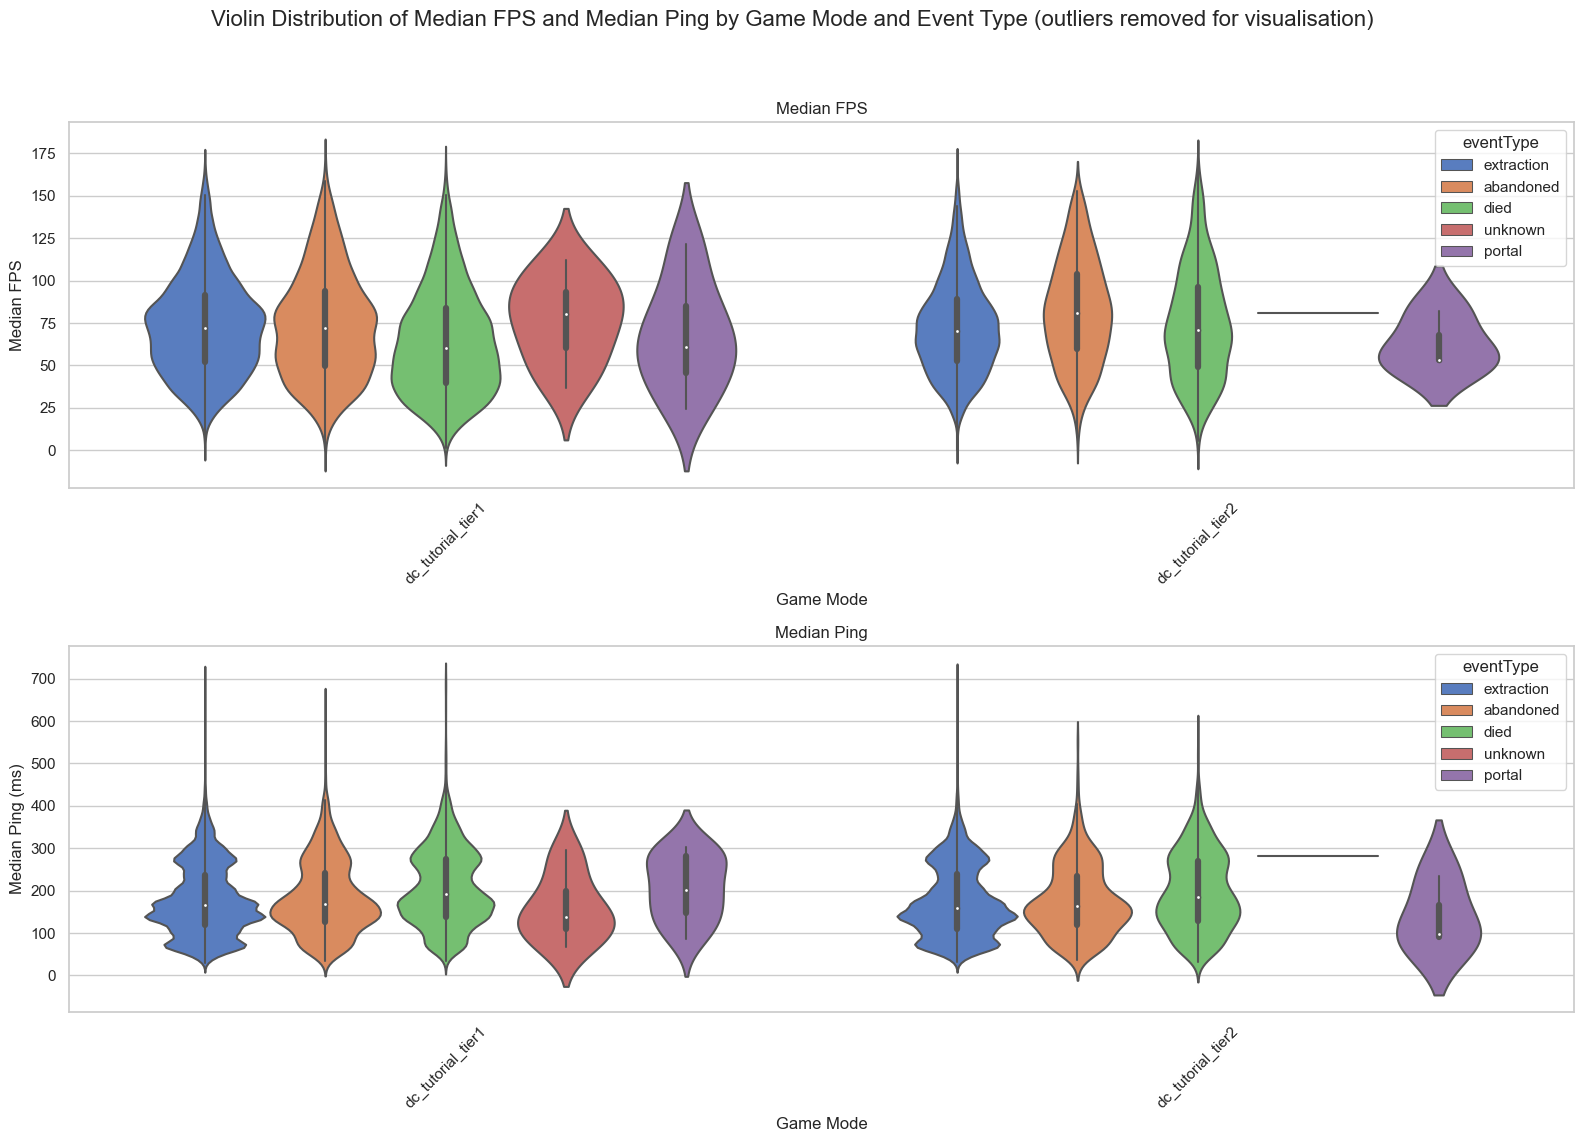

In [18]:
def eventType_violin_plots(data, title):
    # Set up the plotting style
    sns.set(style="whitegrid")

    # Define figure size and subplots
    fig, axs = plt.subplots(2, 1, figsize=(16, 12))
    fig.suptitle(title, fontsize=16)

    # Violin plot for median FPS
    sns.violinplot(data, x="dungeonId", y="median_fps", hue="eventType", ax=axs[0], palette="muted", dodge=True)
    axs[0].set_title("Median FPS")
    axs[0].set_xlabel("Game Mode")
    axs[0].set_ylabel("Median FPS")
    axs[0].tick_params(axis="x", rotation=45)

    # Violin plot for median Ping
    sns.violinplot(data, x="dungeonId", y="median_ping", hue="eventType", ax=axs[1], palette="muted", dodge=True)
    axs[1].set_title("Median Ping")
    axs[1].set_xlabel("Game Mode")
    axs[1].set_ylabel("Median Ping (ms)")
    axs[1].tick_params(axis="x", rotation=45)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    
eventType_violin_plots(df_tutorial,"Violin Distribution of Median FPS and Median Ping by Game Mode and Event Type")
eventType_violin_plots(df_tutorial_no_outliers,"Violin Distribution of Median FPS and Median Ping by Game Mode and Event Type (outliers removed for visualisation)")



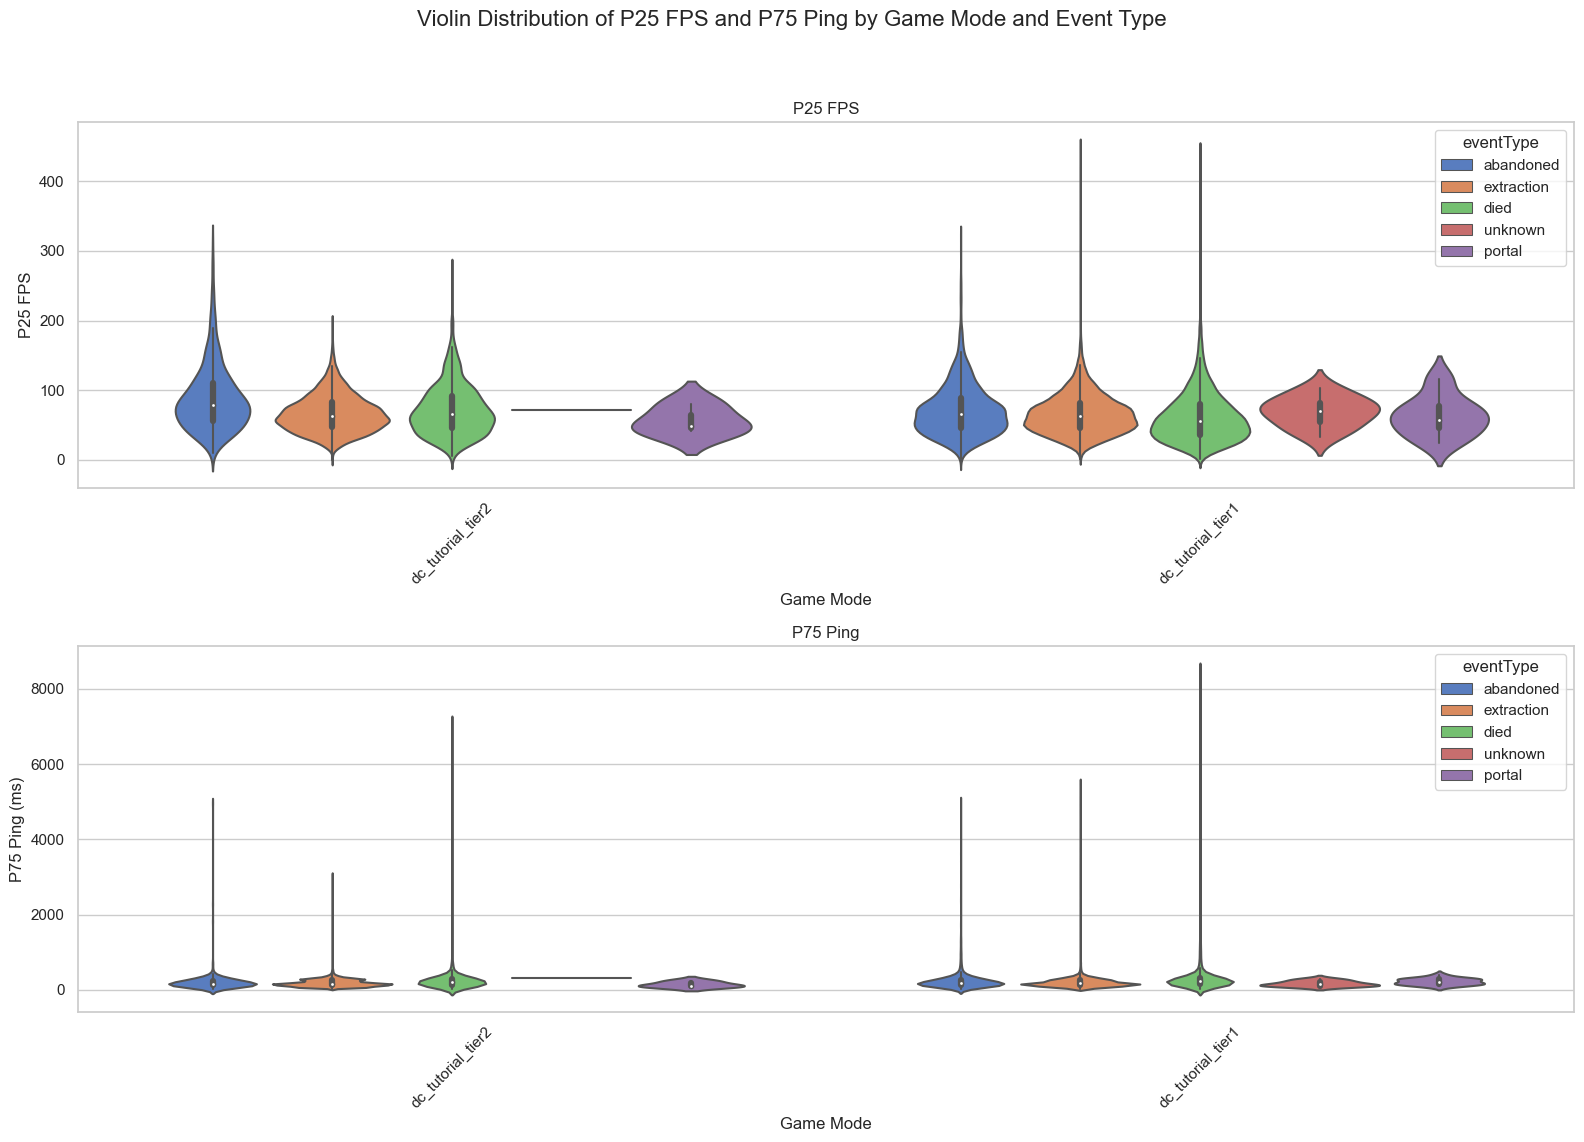

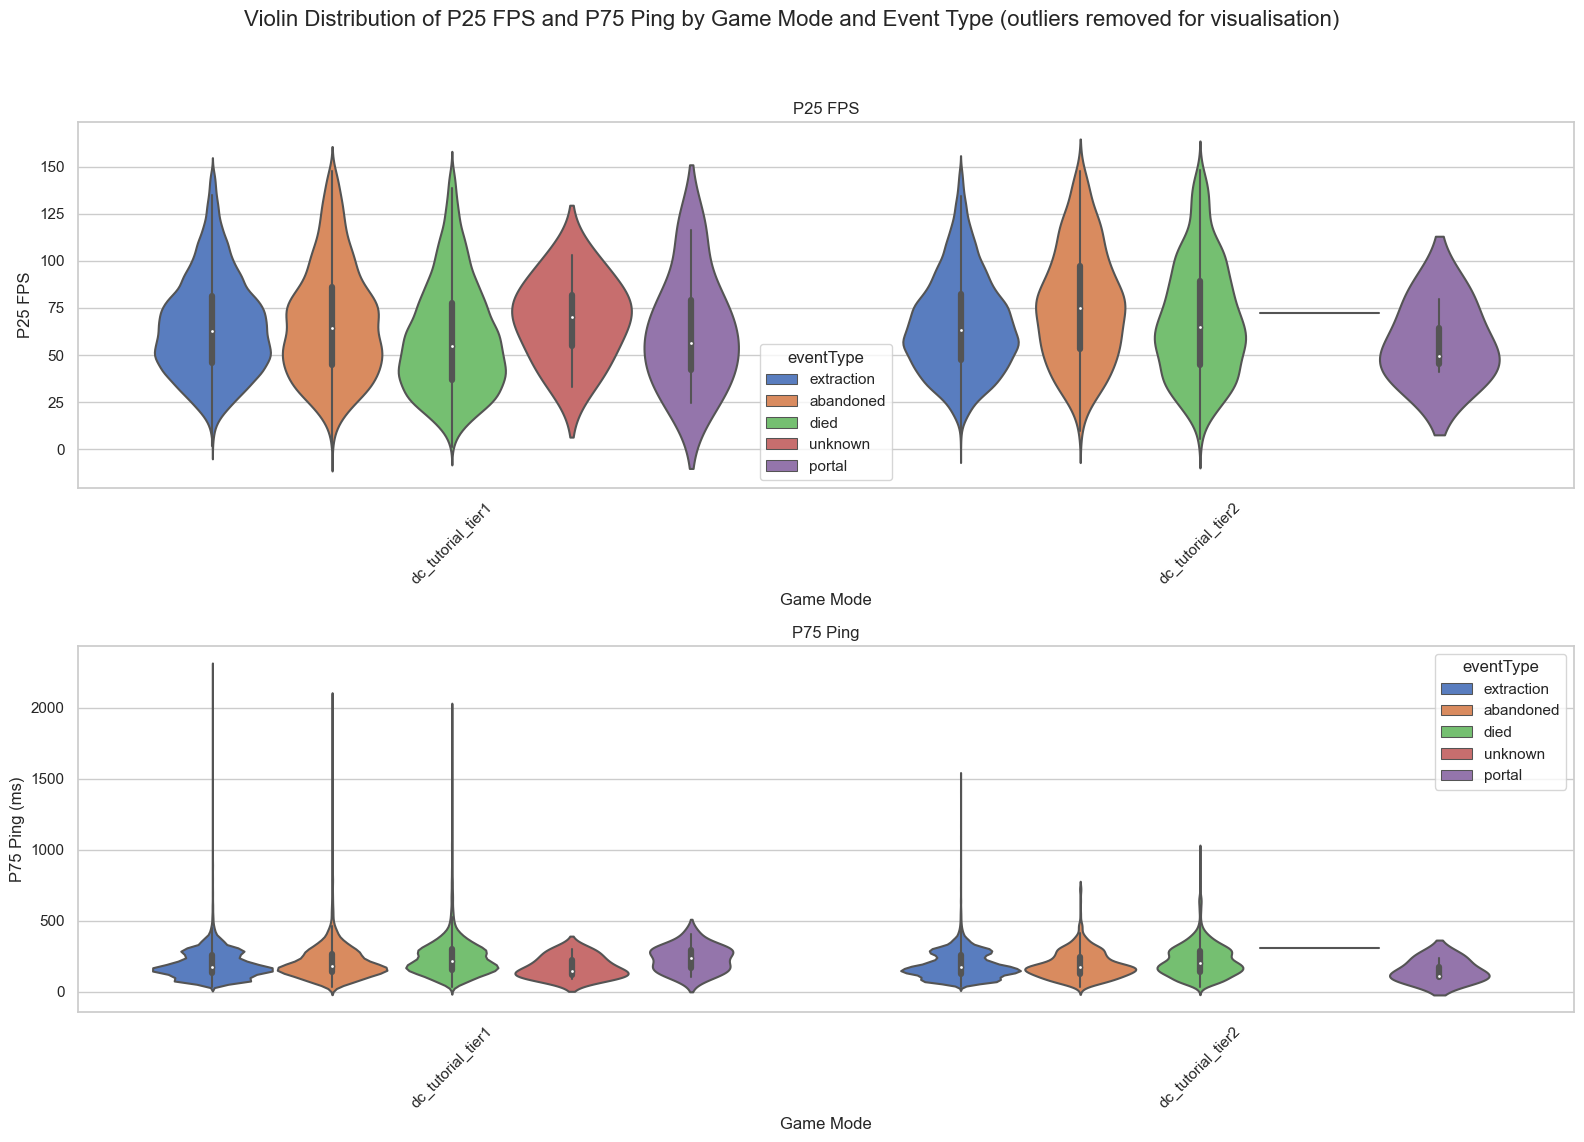

In [19]:
def eventType_violin_plots(data, title):
    # Set up the plotting style
    sns.set(style="whitegrid")

    # Define figure size and subplots
    fig, axs = plt.subplots(2, 1, figsize=(16, 12))
    fig.suptitle(title, fontsize=16)

    # Violin plot for median FPS
    sns.violinplot(data, x="dungeonId", y="p25_fps", hue="eventType", ax=axs[0], palette="muted", dodge=True)
    axs[0].set_title("P25 FPS")
    axs[0].set_xlabel("Game Mode")
    axs[0].set_ylabel("P25 FPS")
    axs[0].tick_params(axis="x", rotation=45)

    # Violin plot for median Ping
    sns.violinplot(data, x="dungeonId", y="p75_ping", hue="eventType", ax=axs[1], palette="muted", dodge=True)
    axs[1].set_title("P75 Ping")
    axs[1].set_xlabel("Game Mode")
    axs[1].set_ylabel("P75 Ping (ms)")
    axs[1].tick_params(axis="x", rotation=45)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    
eventType_violin_plots(df_tutorial,"Violin Distribution of P25 FPS and P75 Ping by Game Mode and Event Type")
eventType_violin_plots(df_tutorial_no_outliers,"Violin Distribution of P25 FPS and P75 Ping by Game Mode and Event Type (outliers removed for visualisation)")


In [20]:
# Filter out rows where isDC is True (since ping could be meaningless)
df_valid = df_tutorial[df_tutorial['isDC'] == False].dropna(
    subset=['median_fps', 'median_ping', 'p25_fps', 'p75_ping']
).copy()


In [21]:
dungeons = ['dc_tutorial_tier1', 'dc_tutorial_tier2']
metrics = ['median_fps', 'median_ping', 'p25_fps', 'p75_ping']

for dungeon in dungeons:
    df_d = df_valid[df_valid['dungeonId'] == dungeon]
    
    for metric in metrics:
        # For each metric, gather data by event type
        # (Check that all event types exist in this dungeon or handle empty groups)
        data_died       = df_d[df_d['eventType'] == 'died'][metric].dropna()
        data_extraction = df_d[df_d['eventType'] == 'extraction'][metric].dropna()
        data_abandoned  = df_d[df_d['eventType'] == 'abandoned'][metric].dropna()
        
        # If any group is empty, skip
        if data_died.empty or data_extraction.empty or data_abandoned.empty:
            print(f"No data for one of the event types in {dungeon} for {metric}, skipping.")
            continue
        
        # One-way ANOVA
        H_stat, p_val_H = kruskal(data_died, data_extraction, data_abandoned)
        f_stat, p_val_f = f_oneway(data_died, data_extraction, data_abandoned)
        
        print(f"{dungeon} - {metric}: F={f_stat:.4f}, p={p_val_f:.4e}")
        print(f"{dungeon} - {metric}: H={H_stat:.4f}, p={p_val_H:.4e}")
        print('\n')


dc_tutorial_tier1 - median_fps: F=225.8938, p=2.4937e-98
dc_tutorial_tier1 - median_fps: H=694.0002, p=1.9942e-151


dc_tutorial_tier1 - median_ping: F=716.5918, p=5.7425e-307
dc_tutorial_tier1 - median_ping: H=1156.8901, p=6.0886e-252


dc_tutorial_tier1 - p25_fps: F=137.0378, p=4.6795e-60
dc_tutorial_tier1 - p25_fps: H=442.8675, p=6.8007e-97


dc_tutorial_tier1 - p75_ping: F=808.0989, p=0.0000e+00
dc_tutorial_tier1 - p75_ping: H=1401.1332, p=5.5950e-305


dc_tutorial_tier2 - median_fps: F=163.6943, p=3.8235e-71
dc_tutorial_tier2 - median_fps: H=133.3130, p=1.1258e-29


dc_tutorial_tier2 - median_ping: F=80.1900, p=2.1713e-35
dc_tutorial_tier2 - median_ping: H=68.3684, p=1.4256e-15


dc_tutorial_tier2 - p25_fps: F=191.6699, p=4.7962e-83
dc_tutorial_tier2 - p25_fps: H=140.1839, p=3.6263e-31


dc_tutorial_tier2 - p75_ping: F=89.5567, p=2.0366e-39
dc_tutorial_tier2 - p75_ping: H=83.1822, p=8.6541e-19




In [22]:
for dungeon in dungeons:
    df_d = df_valid[df_valid['dungeonId'] == dungeon].copy()
    
    # Make sure eventType is categorical
    df_d['eventType'] = df_d['eventType'].astype('category')
    
    # For each numeric metric, do Tukey's if you found ANOVA significant
    for metric in metrics:
        # Filter out rows without data
        df_metric = df_d.dropna(subset=[metric, 'eventType'])
        
        # If any group has no data, skip
        if len(df_metric) == 0 or df_metric['eventType'].nunique() < 2:
            continue
        
        print(f"\n=== {dungeon} | {metric} | Tukey's HSD ===")

        # Perform Tukey's test
        tukey_result = pairwise_tukeyhsd(
            endog=df_metric[metric], 
            groups=df_metric['eventType'], 
            alpha=0.05
        )
        print(tukey_result)


=== dc_tutorial_tier1 | median_fps | Tukey's HSD ===
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
 abandoned       died -11.7158    0.0 -13.7077  -9.724   True
 abandoned extraction  -3.9101    0.0  -5.7213 -2.0989   True
 abandoned     portal -10.0304   0.77 -33.4679 13.4071  False
 abandoned    unknown  -1.5991 0.9999 -28.9481   25.75  False
      died extraction   7.8057    0.0   6.7141  8.8973   True
      died     portal   1.6854 0.9997 -21.7075 25.0783  False
      died    unknown  10.1168 0.8507  -17.194 37.4276  False
extraction     portal  -6.1203 0.9533 -29.4985 17.2579  False
extraction    unknown    2.311 0.9994 -24.9872 29.6093  False
    portal    unknown   8.4313 0.9685 -27.5024  44.365  False
-------------------------------------------------------------

=== dc_tutorial_tier1 | median_ping | Tukey's HSD ===
      Multiple Comparis

In [23]:
df_valid = df_tutorial[
    (df_tutorial['isDC'] == False) &      # Only valid rows
    (df_tutorial['eventType'].notna()) &
    (df_tutorial['median_fps'].notna()) &
    (df_tutorial['median_ping'].notna())
].copy()

# 2. Select your features (X) and outcome (y)
X = df_valid[['median_fps', 'median_ping']]
y = df_valid['eventType']  # eventType has values like "died", "extraction", "abandoned"

# 3. Encode the eventType (string) to numeric labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
# For example, le.classes_ might be ["abandoned", "died", "extraction"],
# and y_enc then becomes 0,1,2 accordingly.

# 4. Create and fit your LogisticRegression model
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',          # 'lbfgs' is a common choice; 'sag' or 'saga' also work
    max_iter=1000            # increase iterations if needed
)
model.fit(X, y_enc)

# 5. Check the results
print("Classes in the order of coefficients:", le.classes_)
print("Intercepts (per class):", model.intercept_)
print("Coefficients (per class):")
print(model.coef_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


KeyboardInterrupt: 